In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [15]:
df1=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [16]:
df2=df1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df2.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
df2.isnull()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False


In [12]:
df2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [17]:
x= df2.drop(columns="Price")
x.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [18]:
y=df2["Price"]
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=74)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
md = LinearRegression()

In [37]:
md.fit(x_train,y_train)

LinearRegression()

In [38]:
c = md.intercept_
c

-8404.424888187152

In [39]:
m = md.coef_
m

array([-1.21205100e+02, -2.00138335e-02,  3.24618020e+01, -9.08312760e-02,
       -1.18324423e+01,  5.65813689e+02,  3.59778192e+00,  1.96205318e+01])

In [40]:
yp_train = md.predict(x_train)
yp_train

array([ 8977.11001603,  8641.38765964, 14027.76039073, ...,
       10990.17008125,  7461.02533736,  9489.75220159])

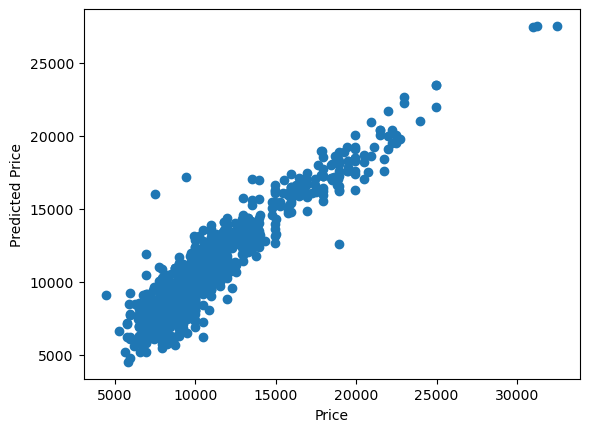

In [41]:
plt.scatter(y_train,yp_train)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.show()

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_train,yp_train)

0.8731602662420462

In [44]:
yp_test = md.predict(x_test)
yp_test

array([13178.31909029,  7508.78215979, 11652.80980471,  9857.72169562,
       11052.97344493, 10931.22825792, 21094.92247905,  9445.9792987 ,
        8612.98854736,  7325.35589334,  9721.98875178,  9491.55306511,
       20959.88517094, 17476.02904388, 13103.7697645 ,  6055.01098704,
        8919.65307272,  8530.13127673, 13361.71068365,  7449.9606961 ,
       11652.79764775, 20345.74879602, 10778.42470009, 11446.54018233,
        7816.63546852,  8825.63023368,  7398.72086583, 11057.30717513,
        9646.98735939,  7712.23233546,  9871.83629666,  9481.66102811,
       10917.59883732,  9042.3465461 , 18830.15393163, 12188.1515937 ,
        8328.59770352,  9811.48384134, 10093.4573851 , 11533.96889572,
       13314.29527894,  7463.28549266, 12298.91595928,  9500.44533643,
       19078.16893067,  7661.04967881,  8239.93892955,  8270.07607969,
        9348.45851075,  9540.72743548,  9949.28318418, 10656.09028253,
       12641.12983984, 10385.1138691 ,  8876.18053646,  7811.26263011,
      

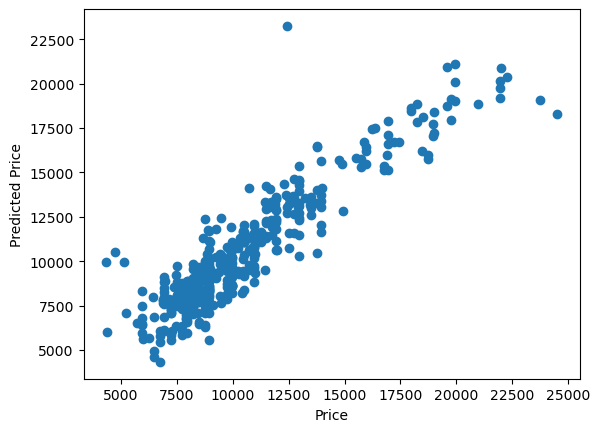

In [45]:
plt.scatter(y_test,yp_test)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.show()

In [46]:
r2_score(y_test,yp_test)

0.8325104000760757